In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report , accuracy_score , f1_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
le=LabelEncoder()


In [4]:
df=pd.read_csv('./train_data_v2.csv')
# df.columns=[i.replace(' ','_') for i in df.columns]
df


,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,2.0,6.0,3.0,Returning_Visitor,Female,Deny,NaN,Married,0.0,True
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Not Specified,ALL,Diploma,Married,0.0,True
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,4.0,2.0,Returning_Visitor,Not Specified,Required,Others,Single,0.0,True
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,4.0,4.0,1.0,Returning_Visitor,Not Specified,Required,Not Specified,Married,0.0,True


# Converting ordinal values to Real Values

### Identify categorical variables

In [ ]:
df.dtypes

HomePage                           float64
HomePage_Duration                  float64
LandingPage                        float64
LandingPage_Duration               float64
ProductDescriptionPage             float64
ProductDescriptionPage_Duration    float64
GoogleMetric:Bounce Rates          float64
GoogleMetric:Exit Rates            float64
GoogleMetric:Page Values           float64
SeasonalPurchase                   float64
Month_SeasonalPurchase              object
OS                                 float64
SearchEngine                       float64
Zone                               float64
Type of Traffic                    float64
CustomerType                        object
Gender                              object
Cookies Setting                     object
Education                           object
Marital Status                      object
WeekendPurchase                    float64
Made_Purchase                         bool
dtype: object

### select features based on their datatypes

In [ ]:
from sklearn.compose import make_column_selector as selector
#selecting categorical columns
cat_cols_selector = selector(dtype_include=object)
cat_cols = cat_cols_selector(df)
print(cat_cols)
#selecting boolean columns
# bool_cols_selector=selector(dtype_include=bool)
# bool_cols=bool_cols_selector(df)
# print(bool_cols)




['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies Setting', 'Education', 'Marital Status']


In [ ]:
for i in cat_cols:
    print(set(df[i]))

# for i in bool_cols:
#     print(set(df[i]))


{nan, 'Feb', 'Dec', 'Mar', 'June', 'May', 'Oct', 'Jul', 'Aug', 'Sep', 'Nov'}
{nan, 'Other', 'New_Visitor', 'Returning_Visitor'}
{'Not Specified', nan, 'Female', 'Male'}
{nan, 'Required', 'ALL', 'Deny'}
{nan, 'Graduate', 'Not Specified', 'Diploma', 'Others'}
{nan, 'Married', 'Other', 'Single'}


In [ ]:

for i in cat_cols:
    df[i]=le.fit_transform(df[i])



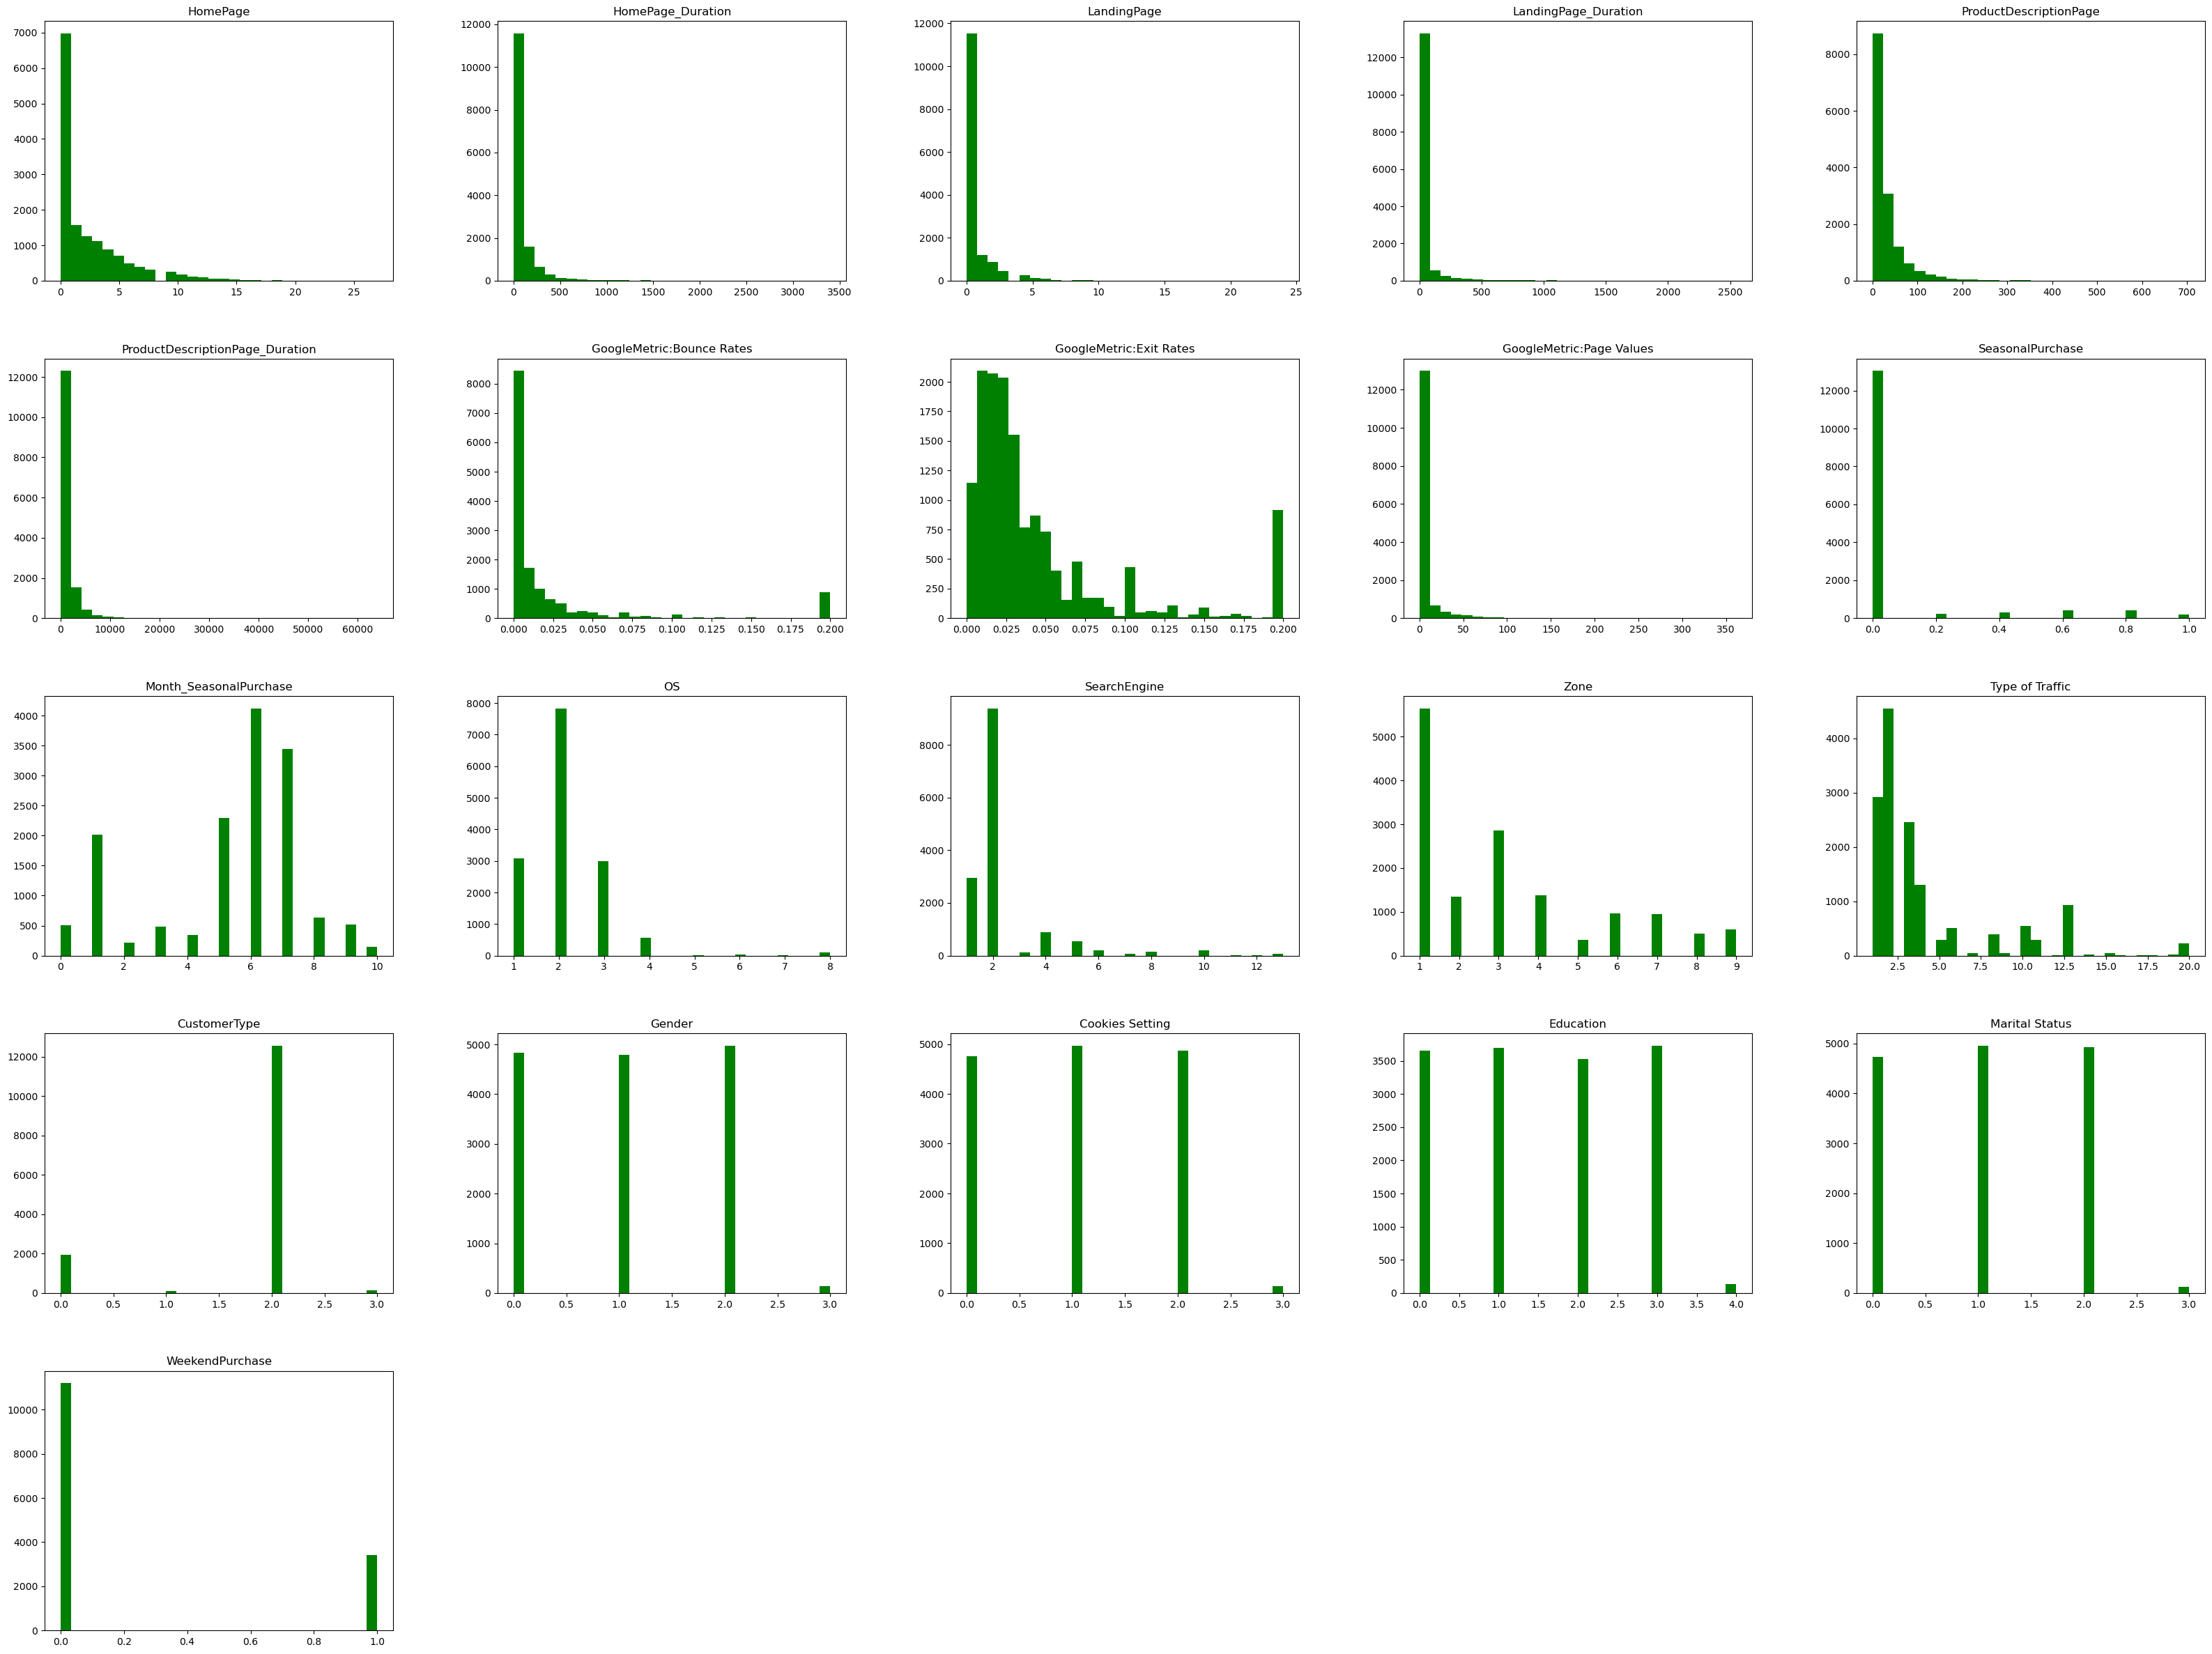

In [ ]:
df.hist(bins = 30 , layout = (5,5), figsize = (40,30)  ,column = df.columns[0:], color= "Green", grid = False)
plt.show()

# Checking for null values and populating the null values

<AxesSubplot:>

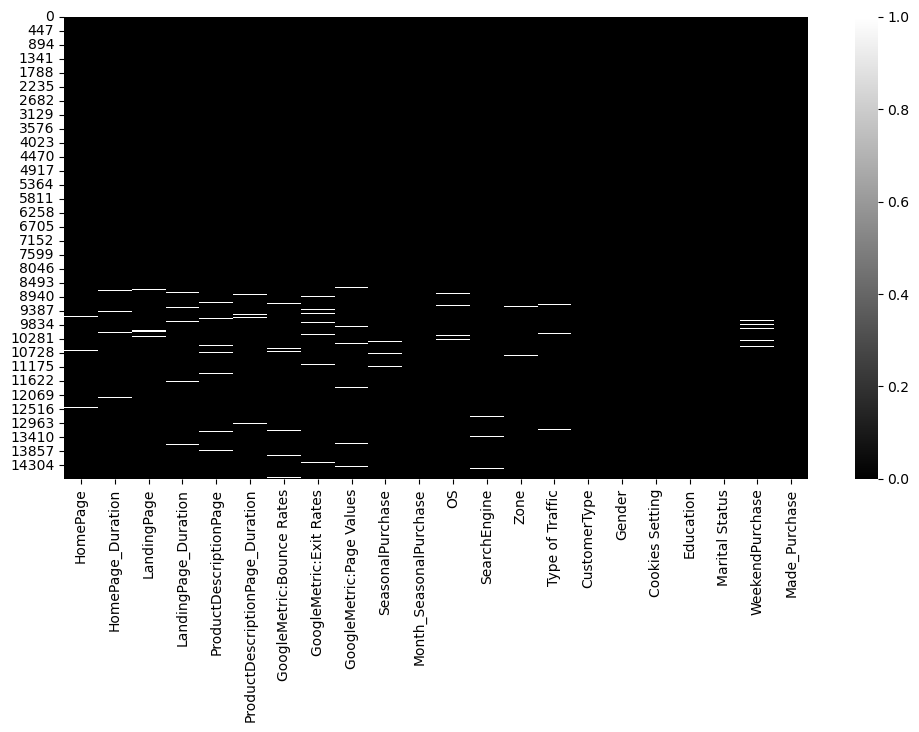

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='gray')

In [ ]:
#filling null values with previous values
#df2=df.fillna(method='pad')
#filling null values with next values
#df3=df.fillna(method='bfill')
#filling null values woth mean of the column
df=df.fillna(df.median())

# from sklearn.impute import KNNImputer
# imputer=KNNImputer(n_neighbors=3,weights='uniform')
# df_imputed=pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
# df=df_imputed


<AxesSubplot:>

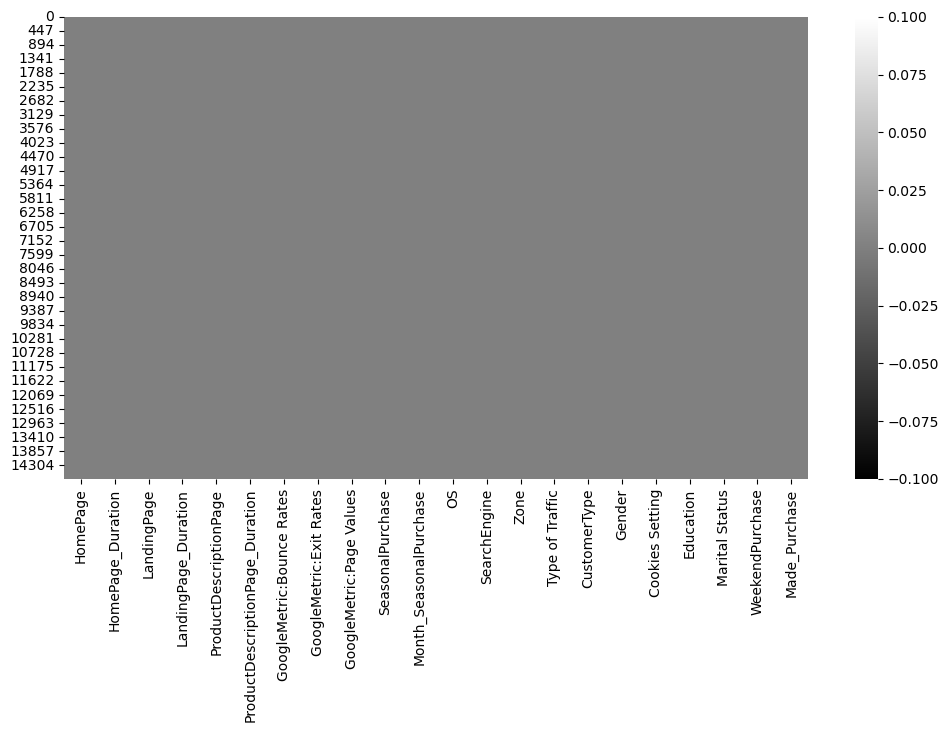

In [ ]:

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),cmap='gray')

# correalation

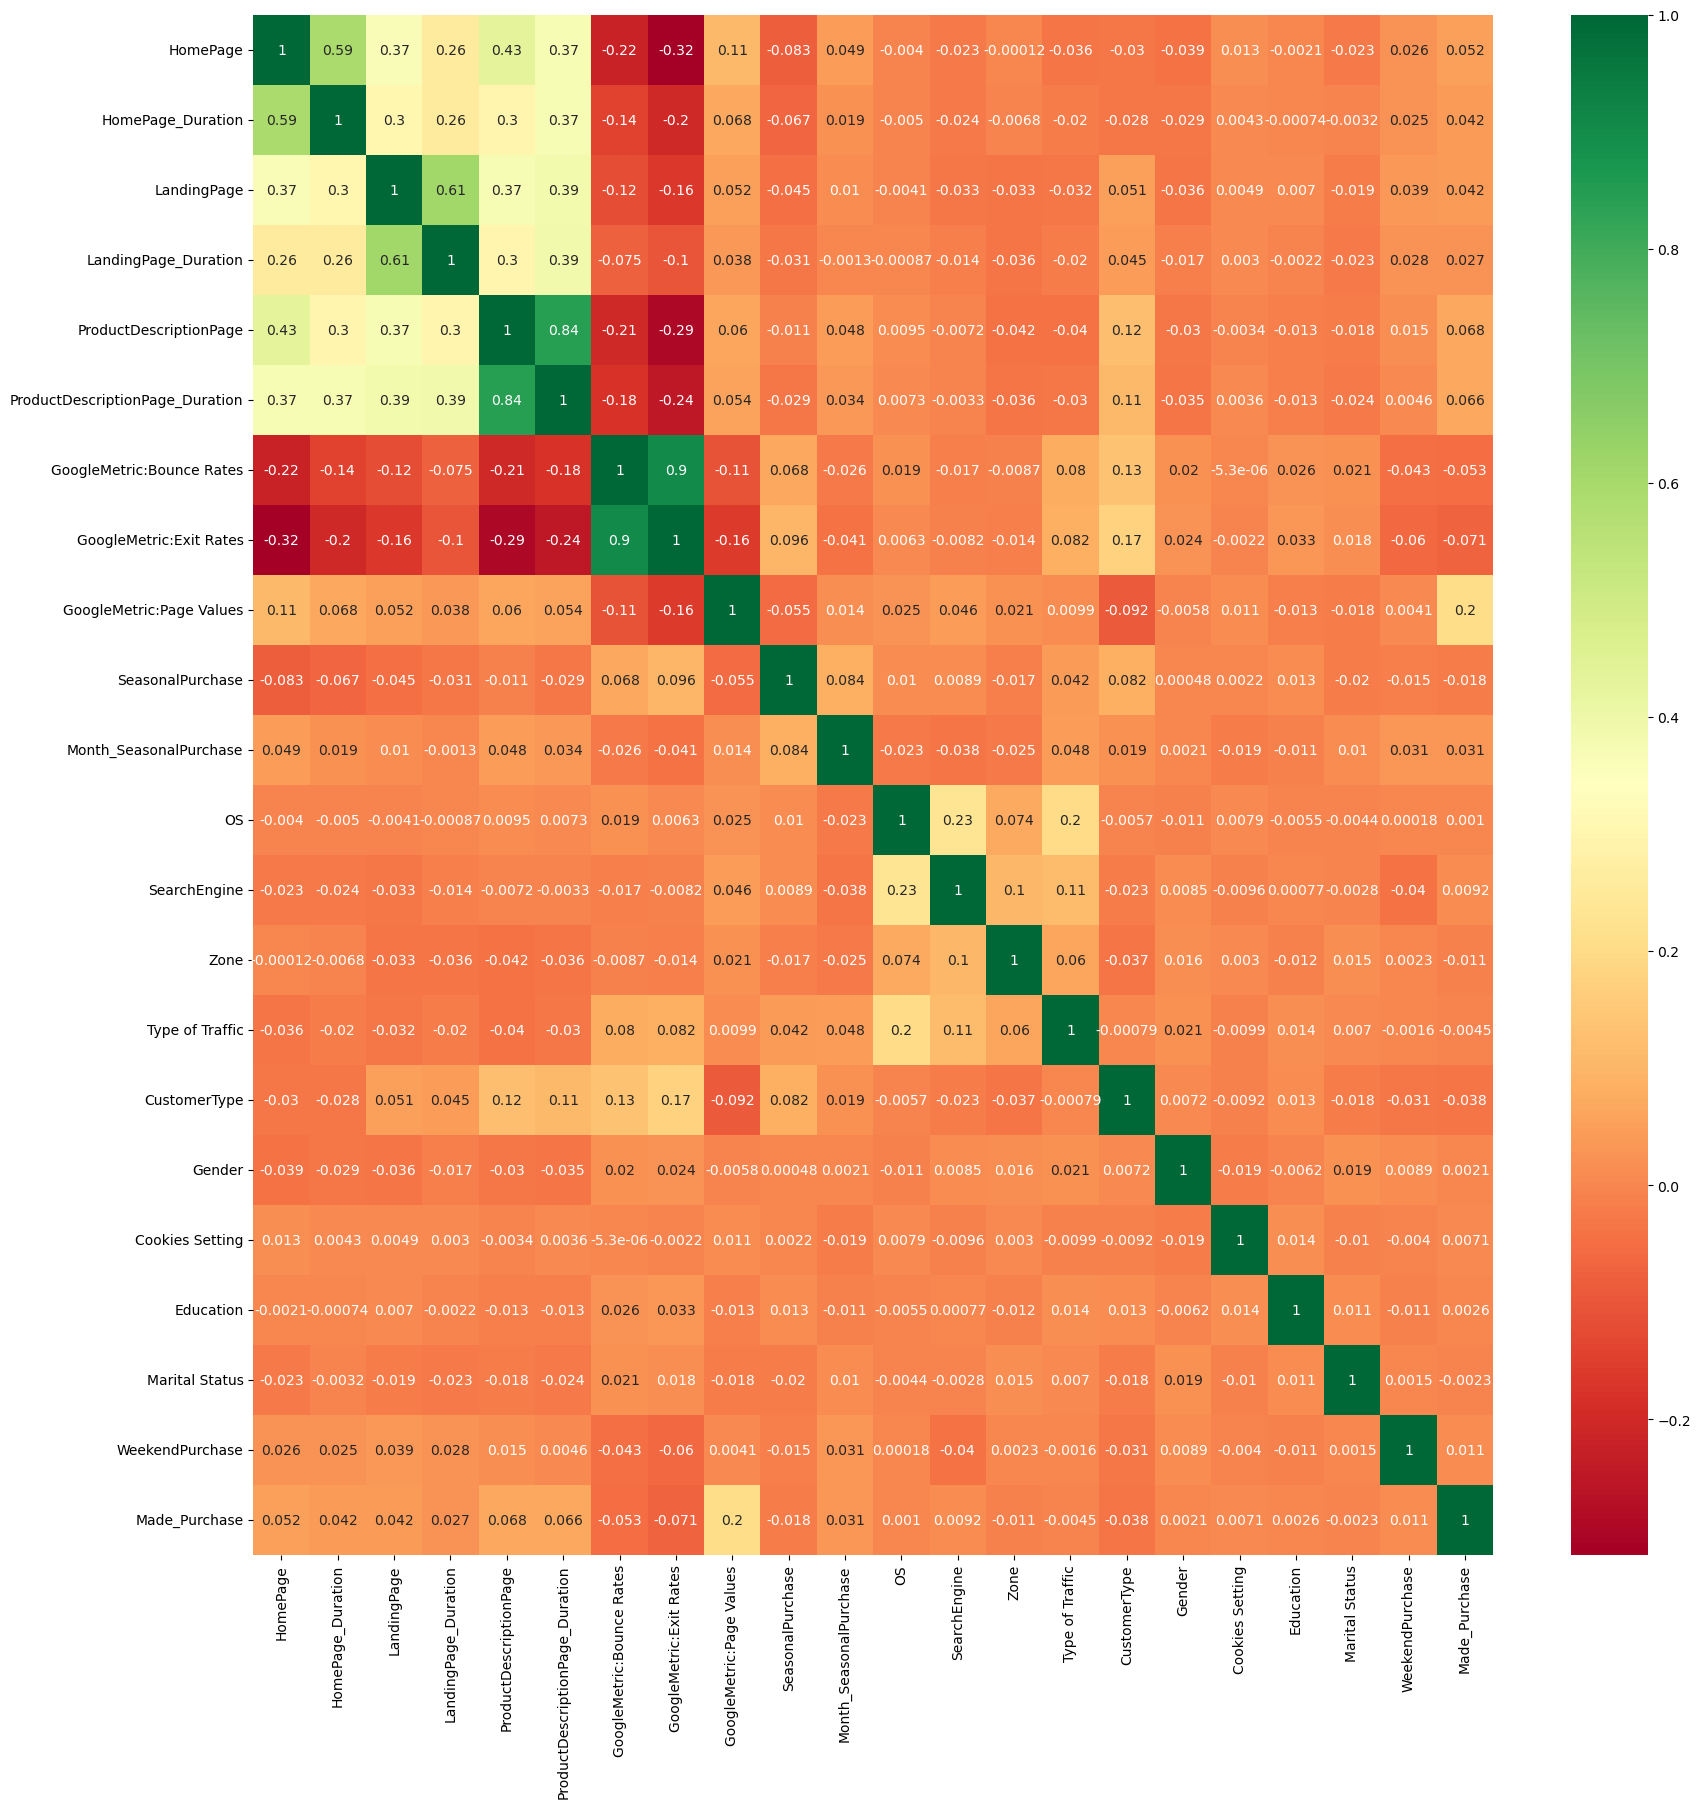

In [ ]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Feature selection

In [ ]:
x=df.drop(['Made_Purchase'],axis=1)
y=df['Made_Purchase']

# Spiltting the dataset

In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit
# split=StratifiedShuffleSplit(test_size=0.2,random_state=42)
# for train_index, test_index in split.split(df,df["Made_Purchase"]):
#     train_set=df.loc["train_index"]
    # test_set=df.loc["test_index"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=4)

# scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
x_train_not_scale=x_train
x_test_not_scale=x_test
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train

array([[-0.37526927, -0.28470288, -0.39144695, ...,  1.29186335,
         1.16750807, -0.55199132],
       [ 0.55271892,  1.23991555, -0.39144695, ..., -1.33435593,
        -0.03563273,  1.81162268],
       [ 0.55271892,  1.58641973, -0.39144695, ...,  1.29186335,
        -1.23877354,  1.81162268],
       ...,
       [-0.37526927, -0.43439269, -0.39144695, ..., -0.4589495 ,
        -0.03563273, -0.55199132],
       [ 3.3366835 ,  2.01941137,  4.4993227 , ..., -0.4589495 ,
        -1.23877354, -0.55199132],
       [-0.37526927, -0.38449609, -0.39144695, ...,  1.29186335,
         1.16750807, -0.55199132]])

In [ ]:
y_train

2445     False
11082     True
7887     False
8880     False
8814      True
         ...  
6017     False
709      False
10679    False
8366      True
1146     False
Name: Made_Purchase, Length: 11784, dtype: bool

<H1 color="green"><u>  model implementation</u>


# ridge classificarion


In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge_classifier=RidgeClassifier(alpha=0.01,fit_intercept=False,solver='lsqr') #fit intercept when data already centred
ridge_classifier.fit(x_train,y_train)
y_pred_ridge=ridge_classifier.predict(x_test)
f1_score_ridge=f1_score(y_pred_ridge,y_test)
print(f1_score_ridge)
#svd=0.451|cholesky=0.451|sparse_cg=0.451|lsqr=0.452|sag=0.452|saga=0.451|
#0.4835

0.45246568378240976


##### hyper parameter tuning

In [ ]:
ridge=RidgeClassifier()
param_grid={
    "alpha":[0.001,0.005,0.01,0.05,0.1,0.5],
    "fit_intercept":[True,False],
    "tol":[0.001,0.005,0.01,0.05,0.1,0.5],
    "solver":['svd','cholesky','sparse_cg','lsqr','sag','saga']
    }
grid_ridge=GridSearchCV(ridge,param_grid=param_grid,scoring="f1")
grid_ridge.fit(x_train,y_train)


GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'sparse_cg', 'lsqr',
                                    'sag', 'saga'],
                         'tol': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]},
             scoring='f1')

In [ ]:
print(grid_ridge.best_params_)
y_pred_grid_ridge=grid_ridge.predict(x_test)
f1_grid_ridge=f1_score(y_test,y_pred_grid_ridge)
print(f1_grid_ridge)

{'alpha': 0.001, 'fit_intercept': False, 'solver': 'lsqr', 'tol': 0.5}
0.4835924006908463


# Perceptron classificiation

In [ ]:
from sklearn.linear_model import Perceptron
perceptron_classifier=Perceptron(warm_start=True)
perceptron_classifier.fit(x_train,y_train)
y_pred_percep= perceptron_classifier.predict(x_test)
f1_score_percep=f1_score(y_pred_percep,y_test)
print(f1_score_percep)
#0.3239277

0.3239277652370203


##### hyperparameter tuning


In [ ]:
perc=Perceptron()
param_grid={
    # 'penalty':['l2','l1','elasticnet'],
    "alpha":[0.001,0.005,0.01,0.05,0.1,0.5],
    "l1_ratio":[0.2,0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    "fit_intercept":[True,False],
    # "max_iter":[1000,2000,5000,10000],
    # "tol":[0.001,0.005,0.01,0.05,0.1,0.5],
    # "shuffle":[True,False],
    # "warm_state":[True,False],
    # "solver":['svd','cholesky','sparse_cg','lsqr','sag','saga']
    }
grid_perc=GridSearchCV(perc,param_grid=param_grid,scoring="f1")
grid_perc.fit(x_train,y_train)

GridSearchCV(estimator=Perceptron(),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.2, 0.1, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='f1')

In [ ]:
grid_ridge.best_params_


{'alpha': 0.001, 'fit_intercept': False, 'solver': 'lsqr', 'tol': 0.5}

# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_regg=LogisticRegression(class_weight="balanced",solver='saga',max_iter=10000)
log_regg.fit(x_train,y_train)
y_pred_log_regg=log_regg.predict(x_test)
f1_score_log_regg=f1_score(y_pred_log_regg,y_test)
acc_log_regg=accuracy_score(y_pred_log_regg,y_test)
print(f1_score_log_regg)
print(acc_log_regg)
#liblinear,saga with l1 having less f1_score compared to 
#works best withour scalling 0.469
#

0.42962962962962964
0.6603325415676959


hyper parameter tuning


In [ ]:
logreg=LogisticRegression()
param_grid={
    'solver':[ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    # 'C': [0.5,1,10,25,50,100,1000],
    "max_iter":[10000,1000],
    'class_weight':["balanced",None]
    }
grid_logreg=GridSearchCV(logreg,param_grid=param_grid,scoring="f1")
grid_logreg.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'class_weight': ['balanced', None],
                         'max_iter': [10000, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [ ]:
print(grid_logreg.best_params_)
y_pred_logreg=grid_logreg.predict(x_test)
logreg_f1=f1_score(y_test,y_pred_logreg)
print(logreg_f1)

{'class_weight': 'balanced', 'max_iter': 10000, 'solver': 'lbfgs'}
0.42962962962962964


# SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier 
sgd_class=SGDClassifier(loss='squared_hinge',penalty='l2',max_iter=1000,shuffle=False)
sgd_class.fit(x_train,y_train)
y_pred_sgd=sgd_class.predict(x_test)


In [ ]:
f1_score_sgd=f1_score(y_pred_sgd,y_test)
print(f1_score_sgd)

0.37447823494335125


hyper parameter tuning


In [ ]:
sgd_clf = SGDClassifier()
param_grid = {
    'loss': ['squared_hinge'],
    'penalty': ['l1', 'l2'],
    'max_iter':[100,1000],
    'shuffle':[False],
    'learning_rate': ['optimal'],
}
grid_sgd = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='accuracy')
grid_sgd.fit(x_train, y_train)

/Users/manas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/manas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/manas/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'learning_rate': ['optimal'],
                         'loss': ['squared_hinge'], 'max_iter': [100, 1000],
                         'penalty': ['l1', 'l2'], 'shuffle': [False]},
             scoring='accuracy')

In [ ]:
print(grid_sgd.best_params_)
y_pred_logreg=grid_sgd.predict(x_test)
grid_sgd_f1=f1_score(y_test,y_pred_logreg)
print(grid_sgd_f1)

{'learning_rate': 'optimal', 'loss': 'squared_hinge', 'max_iter': 100, 'penalty': 'l1', 'shuffle': False}
0.3521035598705502


## Artificial Neural Netwrok

In [ ]:
from sklearn.neural_network import MLPClassifier


ANNClassifier=MLPClassifier(hidden_layer_sizes=(21,10,5),max_iter=1000,verbose=False,random_state=10)
ANNClassifier.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(21, 10, 5), max_iter=1000, random_state=10)

In [ ]:
y_pred_ANN=ANNClassifier.predict(x_test)
y_pred_ANN


array([ True, False, False, ..., False, False,  True])

In [ ]:
f1score= f1_score(y_pred_ANN, y_test)
print(f1score)


0.3728202044497895


# ANN hyperparameter tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV
# ANNClassifier=MLPClassifier(random_state=10)
# grid_values={"max_iter":[100,1000,2000],'hidden_layer_sizes':[(10,),(40,),(50,),(60,),(70,),(80,),(90,),(100,)]}
# grid_mlp=GridSearchCV(ANNClassifier,param_grid=grid_values,scoring="f1")

In [ ]:
# grid_mlp.fit(x_train,y_train)


In [ ]:
# grid_mlp.best_params_

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='kd_tree',leaf_size=30,metric="chebyshev")
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
f1_score_knn=f1_score(y_pred_knn,y_test)
print(f1_score_knn)

0.26606334841628954


# RadiusNeighborsClassifer

In [ ]:
# from sklearn.neighbors import RadiusNeighborsClassifier
# rad_class=RadiusNeighborsClassifier(radius=1.0)
# rad_class.fit(x_train,y_train)
# y_pred_rad_class=rad_class.predict(x_test)
# f1_rad_class=f1_score(y_pred_rad_class,y_test)
# print(f1_rad_class);

# SVC

In [ ]:
from sklearn.svm import SVC
svc=SVC(C=0.5,kernel='linear')
svc.fit(x_train,y_train);
y_pred_svc=svc.predict(x_test)
f1_score_svc=f1_score(y_pred_svc,y_test)
print(f1_score_svc)

0.26559060895084374


# D Trees


#### hyperparameters are obtained from extensive reasearch from online materials for d trees


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtreeclassifier=DecisionTreeClassifier(max_depth= 10,min_impurity_decrease= 0.005, min_samples_split= 16, splitter= 'best',min_samples_leaf=0.005)
dtreeclassifier.fit(x_train,y_train)
y_pred_dtree=dtreeclassifier.predict(x_test)
f1dtree=f1_score(y_pred_dtree, y_test)
print(f1dtree)
#works good without scalling also 0.419     
#0.414626


0.41626794258373206


In [ ]:
# dtree=DecisionTreeClassifier()
# #0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,
# param_grid = {
#     'max_depth': [1,5,10,15,19],
#     'min_samples_split':[2,4,6,8,10,12,14,16,18,20],
#     'min_samples_leaf': [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,1]
# }
# grid_dt=GridSearchCV(dtree,param_grid=param_grid,scoring="f1")
# grid_dt.fit(x_train,y_train)

In [ ]:
# print(grid_dt.best_params_)
# y_pred_gird_dt=grid_dt.predict(x_test)
# dt_f1= f1_score(y_test,y_pred_gird_dt)
# print(dt_f1)


# ada boost


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ababoost_ensemble=AdaBoostClassifier(n_estimators=20, learning_rate=0.1)
ababoost_ensemble.fit(x_train,y_train)
y_pred_ada=ababoost_ensemble.predict(x_test)
f1ada=f1_score(y_pred_ada,y_test)
print(f1ada)
#works good without scalling 0.415


0.4172661870503597


hyperparameter tuning

In [ ]:
ada_clf = AdaBoostClassifier()
param_grid = {'n_estimators': [1,5,10,20,30],
              'learning_rate': [0.00001,0.00005,0.0001,0.0005]
            }

grid_ada = GridSearchCV(ada_clf,param_grid,scoring='f1',cv=2)
grid_ada.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1e-05, 5e-05, 0.0001, 0.0005],
                         'n_estimators': [1, 5, 10, 20, 30]},
             scoring='f1')

In [ ]:
print(grid_ada.best_params_)
y_pred_grid_ada=grid_ada.predict(x_test)
dt_f1= f1_score(y_test,y_pred_grid_ada)
print(dt_f1)
#{'base_estimator': LogisticRegression(class_weight='balanced', max_iter=10000, solver='sag'), 'learning_rate': 0.1, 'n_estimators': 20}


{'learning_rate': 1e-05, 'n_estimators': 1}
0.41626794258373206


# naive bayes


In [ ]:
from sklearn.naive_bayes import *
gusnb=GaussianNB()
bernb=BernoulliNB()
catnb=CategoricalNB()
multinb=MultinomialNB()
compnb=ComplementNB()

gusnb.fit(x_train,y_train)
bernb.fit(x_train,y_train)
# catnb.fit(x_train,y_train)
# multinb.fit(x_train,y_train)
# compnb.fit(x_train,y_train)

y_pred_gusnb=gusnb.predict(x_test)
y_pred_bernb=bernb.predict(x_test)
# y_pred_catnb=catnb.predict(x_test)
# y_pred_multinb=multinb.predict(x_test)
# y_pred_compnb=compnb.predict(x_test)


f1gusnb=f1_score(y_pred_gusnb,y_test)
f1bernb=f1_score(y_pred_bernb,y_test)
# f1catnb=f1_score(y_pred_catnb,y_test)
# f1multinb=f1_score(y_pred_multinb,y_test)
# f1compnb=f1_score(y_pred_compnb,y_test)


print("gusnb ",f1gusnb)
print("bernb ",f1bernb)
# print("catnb"+f1catnb)
# print("multinb"+f1multinb)
# print("compnb"+f1compnb)

#bernb works good without scaling 0.431, guns=0.35


gusnb  0.3605739238927012
bernb  0.43715239154616237


# Bagging


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=100,n_features=21)
bagging_ensemble=BaggingClassifier(n_estimators=10,)
bagging_ensemble.fit(x_train,y_train)
y_pred_bagg=bagging_ensemble.predict(x_test)



In [ ]:
f1_bagg=f1_score(y_pred_bagg,y_test)
print(f1_bagg)

0.31594784353059174


# Submission

In [ ]:
# df_pred=pd.read_csv("./test_data_v2.csv")
# from sklearn.compose import make_column_selector as selector
# #selecting categorical columns
# cat_cols_selector = selector(dtype_include=object)
# cat_cols = cat_cols_selector(df_pred)
# # print(cat_cols)
# for i in cat_cols:
#     df_pred[i]=le.fit_transform(df_pred[i])

# plt.figure(figsize=(12,6))
# sns.heatmap(df.isnull(),cmap='gray')

In [ ]:
# X=df.drop(['Made_Purchase'],axis=1)
# Y=df['Made_Purchase']



In [ ]:
# df_pred=df_pred.fillna(df_pred.median())
# X_test=df_pred
# scaler=StandardScaler()
# X_test_not_scale=X_test

# X_test = scaler.fit_transform(X_test)

In [ ]:
# predictions=log_regg.predict(X_test_not_scale)


In [ ]:
df


,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,9.0,3.0,2,2,1,2,1,0.0,False
1,0.0,0.000000,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,...,2.0,2.0,4.0,2,0,1,3,0,0.0,False
2,0.0,0.000000,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,3.0,1.0,4.0,2,0,0,3,0,1.0,False
3,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.4,...,4.0,3.0,3.0,2,1,0,0,2,0.0,False
4,1.0,0.000000,0.0,0.0,0.0,0.000000,0.200000,0.200000,0.0,0.0,...,2.0,1.0,5.0,2,1,1,0,1,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14726,1.0,4.000000,0.0,0.0,39.0,983.138889,0.015385,0.017599,0.0,0.0,...,2.0,6.0,3.0,2,0,1,4,0,0.0,True
14727,8.0,117.023809,2.0,57.0,11.0,252.892857,0.000000,0.011078,0.0,0.0,...,2.0,2.0,4.0,2,2,0,0,0,0.0,True
14728,2.0,75.600000,2.0,652.8,10.0,1143.666667,0.000000,0.023333,0.0,0.0,...,2.0,4.0,2.0,2,2,2,3,2,0.0,True
14729,0.0,0.000000,0.0,0.0,6.0,1057.000000,0.000000,0.033333,0.0,0.0,...,4.0,4.0,1.0,2,2,2,2,0,0.0,True


#